In [13]:
import becquerel as bq
from becquerel import Spectrum
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import math as m
import importlib

In [31]:
import PF
import ROI
importlib.reload(PF)
importlib.reload(ROI)

<module 'ROI' from 'C:\\Users\\ahanks\\DoseNet\\radwatch-analysis\\ROI.py'>

In [45]:
#Define inputs
source_isotopes = np.array(['K-40']);
source_energies = np.array([1460]);
source_activities = np.array([1]);
spectrum = r'C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\UCB087_Wild_King_Salmon_3.Spe'
background = r'C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\UCB096_Backgorund_2_13_17.Spe'
branching_ratio = np.array([1]);

#Call scripts
roi = ROI.ROI(Spectrum.from_file(spectrum), Spectrum.from_file(background), source_energies)
roi_result = roi.get_counts()
peakfit = PF.PF(spectrum,background,source_energies)
pf_result = peakfit.get_counts()
print()
print(roi_result, pf_result)

SpeFile: Reading file C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\UCB087_Wild_King_Salmon_3.Spe
SpeFile: Reading file C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\UCB096_Backgorund_2_13_17.Spe
SpeFile: Reading file C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\UCB087_Wild_King_Salmon_3.Spe
SpeFile: Reading file C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\UCB096_Backgorund_2_13_17.Spe

[51548.5] [57966.79400977]


In [53]:
spec = Spectrum.from_file(spectrum)
bg = Spectrum.from_file(background)

counts = spec.counts_vals
energies = spec.energies_kev

#function to find index of closest energy where a is the desired energy and n is 
def f_near(a,a0):
    idx = np.abs(a - a0).argmin()
    return idx

k_40_idx = f_near(energies,source_energies[0])
print(k_40_idx)
print(energies[k_40_idx])

SpeFile: Reading file C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\UCB087_Wild_King_Salmon_3.Spe
SpeFile: Reading file C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\UCB096_Backgorund_2_13_17.Spe
7987
1459.9758617672946


In [ ]:
#print(np.where(energies > source_energies[0]-.5 &))

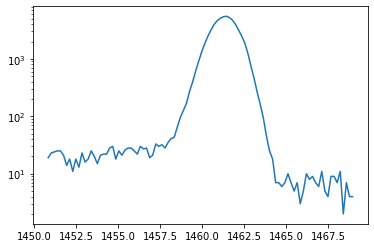

In [50]:
#test plotting
roi_low = k_40_idx - 50
roi_high = k_40_idx + 50

# Slice the counts array: select counts[start-index:stop-index]
plot_counts = counts[roi_low:roi_high]
plot_energies = energies[roi_low:roi_high]

plt.plot(plot_energies,plot_counts)
#plt.plot(spec.energies_kev,spec.counts_vals)
plt.yscale('log')

In [38]:
roi_low_bins, roi_peak_bins, roi_high_bins = roi.get_roi_windows(source_energies[0])
print(roi.window)

print(roi_low_bins[0])
print(roi_peak_bins[0])
print(roi_high_bins[0])

[[-2.  -1. ]
 [-0.5  0.5]
 [ 1.   2. ]]
[7933 7934 7935 7936 7937 7938 7939 7940 7941 7942 7943 7944 7945 7946
 7947 7948 7949 7950 7951 7952 7953 7954 7955 7956 7957 7958 7959]
[7974 7975 7976 7977 7978 7979 7980 7981 7982 7983 7984 7985 7986 7987
 7988 7989 7990 7991 7992 7993 7994 7995 7996 7997 7998 7999 8000]
[8015 8016 8017 8018 8019 8020 8021 8022 8023 8024 8025 8026 8027 8028
 8029 8030 8031 8032 8033 8034 8035 8036 8037 8038 8039 8040 8041]


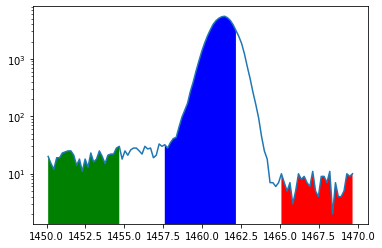

In [52]:
rlow = roi_low_bins[0][0]
rhi = roi_high_bins[0][-1]

plot_counts = counts[rlow:rhi]
plot_energies = energies[rlow:rhi]

rhi = roi_low_bins[0][-1]
low_counts = counts[rlow:rhi]
low_energies = energies[rlow:rhi]

rlow = roi_high_bins[0][0]
rhi = roi_high_bins[0][-1]
high_counts = counts[rlow:rhi]
high_energies = energies[rlow:rhi]

rlow = roi_peak_bins[0][0]
rhi = roi_peak_bins[0][-1]
peak_counts = counts[rlow:rhi]
peak_energies = energies[rlow:rhi]

fig, ax = plt.subplots()
ax.plot(plot_energies,plot_counts)

ax.fill_between(low_energies, 0, low_counts, facecolor='green', interpolate=True)
ax.fill_between(high_energies, 0, high_counts, facecolor='red', interpolate=True)
ax.fill_between(peak_energies, 0, peak_counts, facecolor='blue', interpolate=True)
ax.set_yscale('log')

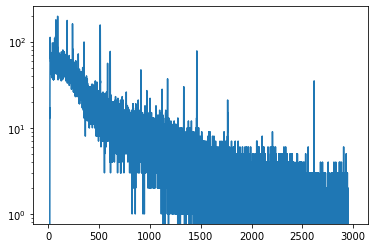

In [54]:
bgcounts = bg.counts_vals
bgenergies = bg.energies_kev

plt.plot(bgenergies,bgcounts)
plt.yscale('log')
plt.show()

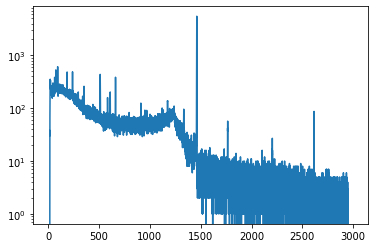

In [55]:
plt.plot(energies,counts)
plt.yscale('log')
plt.show()

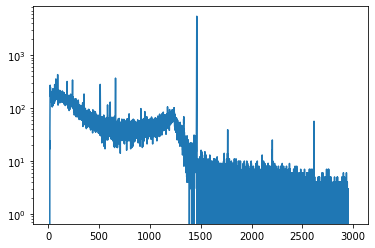

In [57]:
bgspec = spec - bg
plt.plot(bgspec.energies_kev,counts-bgcounts)
plt.yscale('log')
plt.show()